# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets/Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [3]:
# Your EDA code here
# 1. How many unique job titles are there?

title_jobs = df['job_title'].unique()
title_jobs
print(f'There are a total of {len(title_jobs)} unique titles.')

There are a total of 93 unique titles.


In [4]:
# 2. What is the average salary (salary_in_usd) per work_year?

print('''
The Average Salary in 2020 was ₱92,302.63.
While the Average Salary in 2021 was ₱94,087.21.
While 2022 was ₱133,379.51.
Lastly, the Average Salary in 2023 was ₱148,954.56.
''')
df.groupby('work_year')['salary_in_usd'].mean().reset_index().round(2)



The Average Salary in 2020 was ₱92,302.63.
While the Average Salary in 2021 was ₱94,087.21.
While 2022 was ₱133,379.51.
Lastly, the Average Salary in 2023 was ₱148,954.56.



,work_year,salary_in_usd
0,2020,92302.63
1,2021,94087.21
2,2022,133379.51
3,2023,148954.56


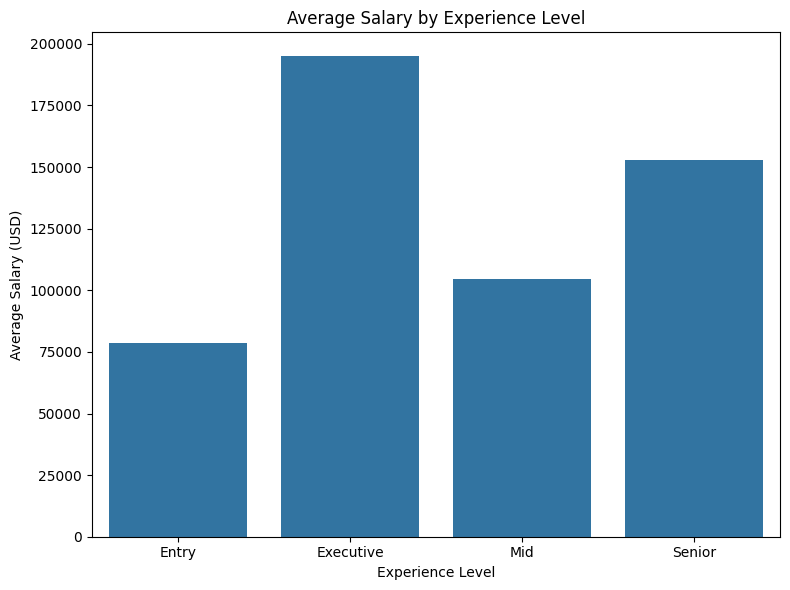

In [5]:
# 3. Create a bar plot showing average salary by experience_level.

average_per_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

exp = {
    'EN': 'Entry',
    'EX': 'Executive',
    'MI': 'Mid',
    'SE': 'Senior'
}

average_per_exp['experience_level'] = average_per_exp['experience_level'].map(exp)

plt.figure(figsize=(8, 6))
sns.barplot(data=average_per_exp, x='experience_level', y='salary_in_usd')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [43]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])
df['job_title_encoded'] = le.fit_transform(df['job_title'])
df['employment_type_encoded'] = le.fit_transform(df['employment_type'])

# Choose your features
features = ['work_year','experience_level_encoded','job_title_encoded','employment_type_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded,job_title_encoded,employment_type_encoded
0,2023,0,8,2
1,2023,0,8,2
2,2023,0,41,2
3,2023,0,22,2
4,2023,0,8,2


## 📈 Part 4: Train a Linear Regression Model

In [47]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.17
RMSE: 58604.66


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [46]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  # EN, MI, SE, EX
    'job_title_encoded' : [25, 25, 25, 25], #  (25) - Data Analyst
    'employment_type_encoded' : [2,2,2,2] # FT
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,107827.384048
1,Mid,127699.436037
2,Senior,147571.488027
3,Executive,167443.540016


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h3>1. Does your model make reasonable predictions? Why or why not?</h3>
<p>Answer: <span style='font-weight: bold'>For me, I think my model does not seem to be plausible. Based on the Linear Regression Model in Part 4, the R-squared that it gave was only 0.17, which means it explains less than 20% or specifically only 17% of what actually affects salary. My model only predicts the 2024 Salary of a Full-Time Data Analyst, while the Job Titles available are too many, hence the reason why the R-squared is only at 0.17.</span></p>

<h3>2. What are the limitations of using only work_year and exprerience_level?</h3>
<p>Answer: <span style='font-weight: bold'>If we were to predict salaries using only work years and experience levels. There are too many variables or independent variables to be considered to have an accurate prediction. For example are the employment types are Full-Time, Part-Time, etc.</span></p>

<h3>3. How could you improve this model? (Think: more features, better encoding, etc.)</h3>
<p>Answer: <span style='font-weight: bold'>For me, the best way to improve this model is to only include features that are actually useful and would bring a reasonable prediction.</span></p>

<h3>4. Why is R² not enough to trust your predictions?</h3>
<p>Answer: <span style='font-weight: bold'>The R-Squared that is based on my model only predicts a certain salary of a job title and employment type. It does not scope the general datas of each features. R-squared also only shows how well the model fits the data, and is not good at predicting. Sometimes a model can also have a high R-squared but still provides bad predictions. That is why R-squared is not enough.</span></p>
<br>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀